In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models  
from tensorflow.keras.layers import Dropout 
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive 

In [ ]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu')) 
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 flatten_2 (Flatten)         (None, 512)              

In [ ]:

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()  
X = np.concatenate((train_images,test_images))
y = np.concatenate((train_labels,test_labels))
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=12000, random_state=17)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
test_images.shape[0] # 12000 test image

12000

In [ ]:
train_images.shape[0] # 48000 train image

48000

In [ ]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1500/1500 [==============================] - 16s 5ms/step - loss: 1.5759 - accuracy: 0.4250 - val_loss: 1.4047 - val_accuracy: 0.4969
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.2672 - accuracy: 0.5495 - val_loss: 1.1881 - val_accuracy: 0.5788
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1464 - accuracy: 0.5965 - val_loss: 1.1067 - val_accuracy: 0.6125
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0534 - accuracy: 0.6282 - val_loss: 1.1465 - val_accuracy: 0.5957
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9900 - accuracy: 0.6495 - val_loss: 1.0525 - val_accuracy: 0.6288
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9348 - accuracy: 0.6708 - val_loss: 0.9923 - val_accuracy: 0.6512
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.8935 - accuracy: 0.6851 - val_loss: 0.9549 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


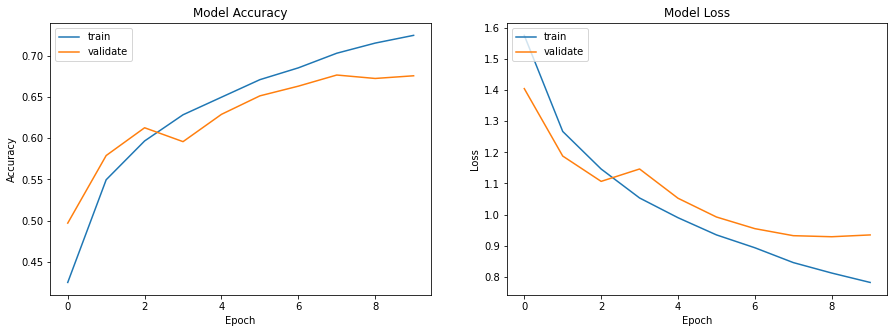

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

The detailed graphs of models are plotted above  which includes 3 conv layer 32 filter,10 epoch train.Train accuracy %74,test set accuracy %69. We can say that we have overfit and underfit problem.

#New Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.Flatten()) 

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

In [ ]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 1.5012 - accuracy: 0.4540 - val_loss: 1.2445 - val_accuracy: 0.5548
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.1304 - accuracy: 0.5994 - val_loss: 1.0783 - val_accuracy: 0.6229
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.9928 - accuracy: 0.6507 - val_loss: 1.0414 - val_accuracy: 0.6484
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8922 - accuracy: 0.6884 - val_loss: 0.9365 - val_accuracy: 0.6720
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.8274 - accuracy: 0.7111 - val_loss: 0.9128 - val_accuracy: 0.6804
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.7643 - accuracy: 0.7315 - val_loss: 0.9038 - val_accuracy: 0.6904
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.7152 - accuracy: 0.7493 - val_loss: 0.9134 - val_accuracy:

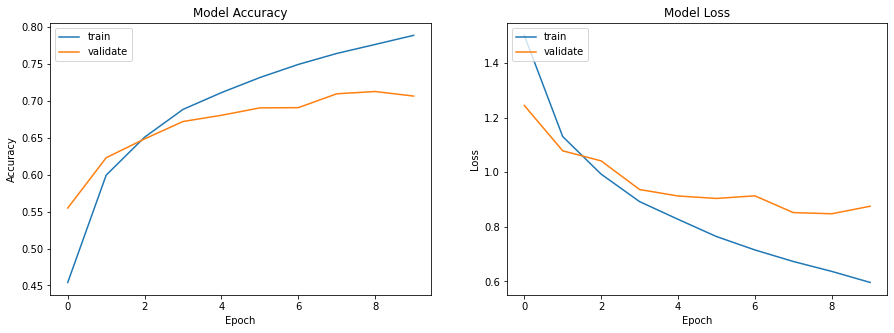

In [ ]:
plotmodelhistory(history)

The detailed graphs of models are plotted above which includes 3 conv layer 64 filter,10 epoch train.Train accuracy %78,test set accuracy %70. We can say that our new model learned train set little bit better. However,in test set there is not enough improvment.

# NEW MODEL

In [ ]:
model = models.Sequential() 

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(32, (3, 3), activation='relu'))    
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Conv2D(32, (3, 3), activation='relu'))    
model.add(BatchNormalization()) 
model.add(layers.Conv2D(32, (3, 3), activation='relu'))    
model.add(layers.MaxPooling2D((2, 2))) 
model.add(Dropout(0.25))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))  

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 dense_14 (Dense)            (None, 13, 13, 256)       8448      
                                                                 
 conv2d_66 (Conv2D)          (None, 11, 11, 32)        73760     
                                                                 
 batch_normalization_3 (Batc  (None, 11, 11, 32)       128       
 hNormalization)                                     

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()  
X = np.concatenate((train_images,test_images))
y = np.concatenate((train_labels,test_labels))
train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size=12000, random_state=17)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
test_images.shape[0] # 12000 test image

12000

In [ ]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.6160 - accuracy: 0.4040 - val_loss: 1.4645 - val_accuracy: 0.4773
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.2879 - accuracy: 0.5388 - val_loss: 2.2486 - val_accuracy: 0.3528
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.1617 - accuracy: 0.5886 - val_loss: 1.4515 - val_accuracy: 0.4915
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 1.0856 - accuracy: 0.6181 - val_loss: 1.3100 - val_accuracy: 0.5444
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.0400 - accuracy: 0.6344 - val_loss: 1.5456 - val_accuracy: 0.4957
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.9929 - accuracy: 0.6483 - val_loss: 1.2485 - val_accuracy: 0.5846
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.9620 - accuracy: 0.6621 - val_loss: 1.2334 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


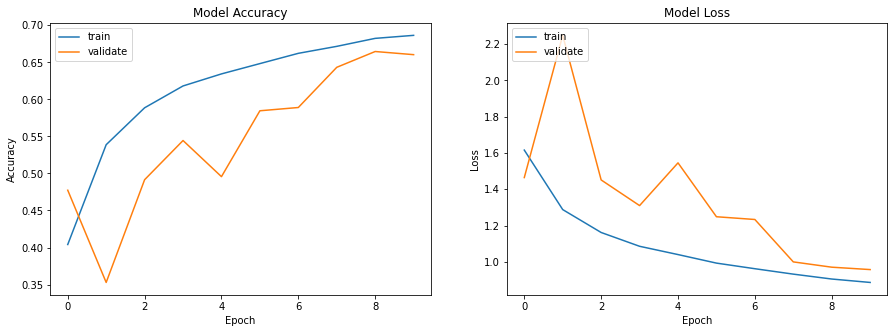

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

The detailed graphs of models are plotted above which includes 5 conv layer 32 filter,10 epoch train.Train accuracy %68,test set accuracy %66. We can say that we have overfit and underfit problem.Also model didn't learn better.

#YENİ MODEL

In [ ]:
model = models.Sequential() 

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))    
model.add(layers.Dense(256, activation='relu'))  
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))    
model.add(BatchNormalization()) 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))    
model.add(layers.MaxPooling2D((2, 2))) 
model.add(Dropout(0.25))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))  

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 dense (Dense)               (None, 13, 13, 256)       16640     
                                                                 
 dropout (Dropout)           (None, 13, 13, 256)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        147520    
                                                        

In [ ]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 1.5955 - accuracy: 0.4164 - val_loss: 1.2951 - val_accuracy: 0.5372
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.2766 - accuracy: 0.5431 - val_loss: 1.3717 - val_accuracy: 0.5232
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.1413 - accuracy: 0.5949 - val_loss: 1.5062 - val_accuracy: 0.4837
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.0579 - accuracy: 0.6255 - val_loss: 1.0236 - val_accuracy: 0.6401
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.9824 - accuracy: 0.6551 - val_loss: 1.0401 - val_accuracy: 0.6356
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.9330 - accuracy: 0.6731 - val_loss: 1.0464 - val_accuracy: 0.6455
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.8884 - accuracy: 0.6885 - val_loss: 0.9787 - val_accurac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


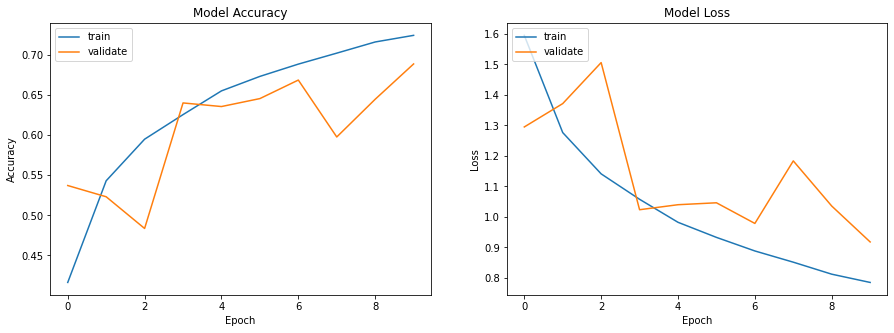

In [ ]:
print(history.history.keys())

plotmodelhistory(history)

In [ ]:
model = models.Sequential() 

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3))) 
model.add(layers.MaxPooling2D((2, 2)))  
model.add(Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))    
model.add(layers.Dense(256, activation='relu'))  
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))    
model.add(BatchNormalization()) 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))    
model.add(layers.MaxPooling2D((2, 2))) 
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) 
model.add(Dropout(0.25))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 dense_3 (Dense)             (None, 13, 13, 256)       16640     
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 256)       0         
                                                      

In [ ]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1500/1500 [==============================] - 19s 7ms/step - loss: 1.7596 - accuracy: 0.3452 - val_loss: 1.6381 - val_accuracy: 0.4183
Epoch 2/20
1500/1500 [==============================] - 10s 6ms/step - loss: 1.4368 - accuracy: 0.4820 - val_loss: 1.3456 - val_accuracy: 0.5159
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 1.3137 - accuracy: 0.5341 - val_loss: 1.1604 - val_accuracy: 0.5894
Epoch 4/20
1500/1500 [==============================] - 10s 6ms/step - loss: 1.2217 - accuracy: 0.5693 - val_loss: 1.2309 - val_accuracy: 0.5743
Epoch 5/20
1500/1500 [==============================] - 10s 6ms/step - loss: 1.1525 - accuracy: 0.5969 - val_loss: 1.0912 - val_accuracy: 0.6124
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 1.1009 - accuracy: 0.6172 - val_loss: 1.0822 - val_accuracy: 0.6224
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 1.0572 - accuracy: 0.6321 - val_loss: 1.0634 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


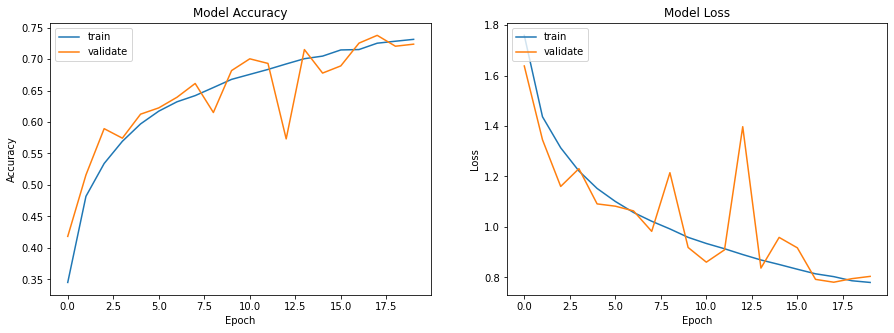

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

print(history.history.keys())

plotmodelhistory(history)

The detailed graphs of models are plotted above which includes 5 conv layer 64 filters,10 epoch train.Train accuracy %71,test set accuracy %70.This is best model we trained.Therefore I added some dropout layers and retrain model with 20 epoch. In 20 epoch, graphs  are above. Test accuracy %72,train accuracy %73.

In [ ]:
model.save('/content/gdrive/MyDrive/Colab Notebooks')

#New Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(Dropout(0.25))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(Dropout(0.25))
model.add(layers.Conv2D(32, (5, 5), activation='relu')) 
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_80 (Conv2D)          (None, 10, 10, 32)        25632     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 5, 5, 32)        

In [ ]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 1.6566 - accuracy: 0.3925 - val_loss: 1.4022 - val_accuracy: 0.4981
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.3662 - accuracy: 0.5071 - val_loss: 1.2719 - val_accuracy: 0.5543
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.2529 - accuracy: 0.5495 - val_loss: 1.1610 - val_accuracy: 0.5877
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.1821 - accuracy: 0.5778 - val_loss: 1.1172 - val_accuracy: 0.6089
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.1291 - accuracy: 0.5970 - val_loss: 1.0610 - val_accuracy: 0.6254
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.0839 - accuracy: 0.6159 - val_loss: 1.0033 - val_accuracy: 0.6483
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0466 - accuracy: 0.6311 - val_loss: 1.0226 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


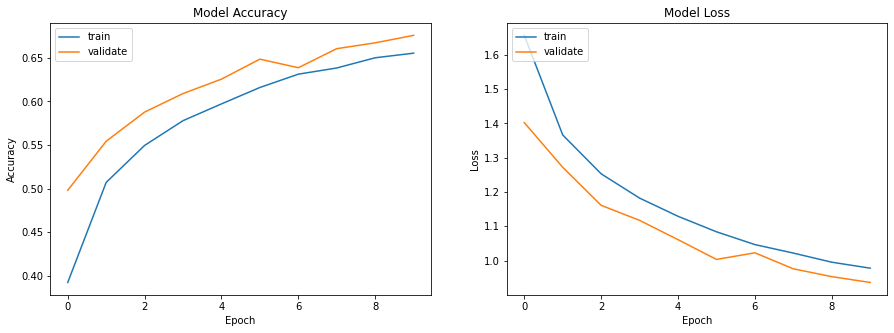

In [ ]:
print(history.history.keys())

plotmodelhistory(history)

#New Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (5,5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (5, 5), activation='relu')) 
model.add(layers.Flatten()) 

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_86 (Conv2D)          (None, 10, 10, 64)        102464    
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_35 (Dropout)        (None, 5, 5, 64)        

In [ ]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.5918 - accuracy: 0.4167 - val_loss: 1.3096 - val_accuracy: 0.5367
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.2867 - accuracy: 0.5404 - val_loss: 1.1591 - val_accuracy: 0.5884
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.1646 - accuracy: 0.5855 - val_loss: 1.1032 - val_accuracy: 0.6152
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0842 - accuracy: 0.6163 - val_loss: 1.0507 - val_accuracy: 0.6267
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.0262 - accuracy: 0.6380 - val_loss: 0.9839 - val_accuracy: 0.6556
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.9773 - accuracy: 0.6552 - val_loss: 0.9680 - val_accuracy: 0.6597
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.9464 - accuracy: 0.6655 - val_loss: 0.9122 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


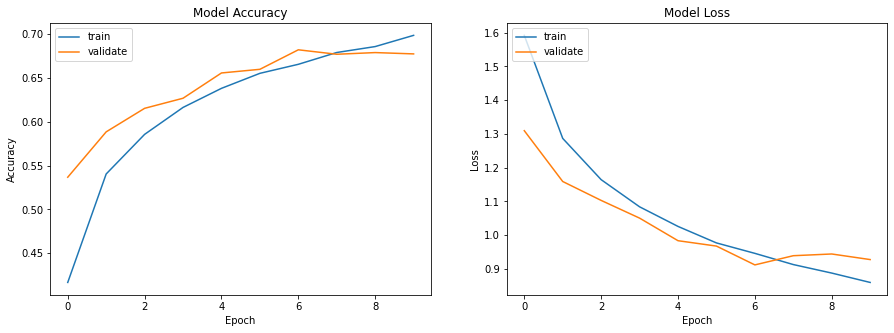

In [ ]:
print(history.history.keys())

plotmodelhistory(history)

Train 69 test 6. 64 filtre kullanıldı. Filtrler 5*5

#Yeni Model

In [ ]:
model = models.Sequential() 

model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3))) 
model.add(Dropout(0.25))
model.add(layers.Conv2D(32, (5,5), activation='relu'))    
model.add(layers.Dense(256)) 
model.add(Dropout(0.25))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))    
model.add(BatchNormalization()) 
model.add(layers.Conv2D(32, (5, 5), activation='relu'))     
model.add(Dropout(0.25))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))  

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_143 (Conv2D)         (None, 28, 28, 32)        2432      
                                                                 
 dropout_58 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 conv2d_144 (Conv2D)         (None, 24, 24, 32)        25632     
                                                                 
 dense_42 (Dense)            (None, 24, 24, 256)       8448      
                                                                 
 dropout_59 (Dropout)        (None, 24, 24, 256)       0         
                                                                 
 conv2d_145 (Conv2D)         (None, 20, 20, 32)        204832    
                                                                 
 batch_normalization_17 (Bat  (None, 20, 20, 32)     

In [ ]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1500/1500 [==============================] - 17s 11ms/step - loss: 1.8653 - accuracy: 0.3103 - val_loss: 1.7341 - val_accuracy: 0.3568
Epoch 2/20
1500/1500 [==============================] - 16s 11ms/step - loss: 1.6238 - accuracy: 0.3991 - val_loss: 1.7075 - val_accuracy: 0.3858
Epoch 3/20
1500/1500 [==============================] - 16s 10ms/step - loss: 1.5225 - accuracy: 0.4408 - val_loss: 1.6060 - val_accuracy: 0.4245
Epoch 4/20
1500/1500 [==============================] - 16s 11ms/step - loss: 1.4543 - accuracy: 0.4700 - val_loss: 1.5527 - val_accuracy: 0.4464
Epoch 5/20
1500/1500 [==============================] - 16s 11ms/step - loss: 1.3864 - accuracy: 0.4940 - val_loss: 1.3829 - val_accuracy: 0.4972
Epoch 6/20
1500/1500 [==============================] - 16s 11ms/step - loss: 1.3203 - accuracy: 0.5202 - val_loss: 1.3634 - val_accuracy: 0.5082
Epoch 7/20
1500/1500 [==============================] - 16s 10ms/step - loss: 1.2617 - accuracy: 0.5429 - val_loss: 1.2802 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


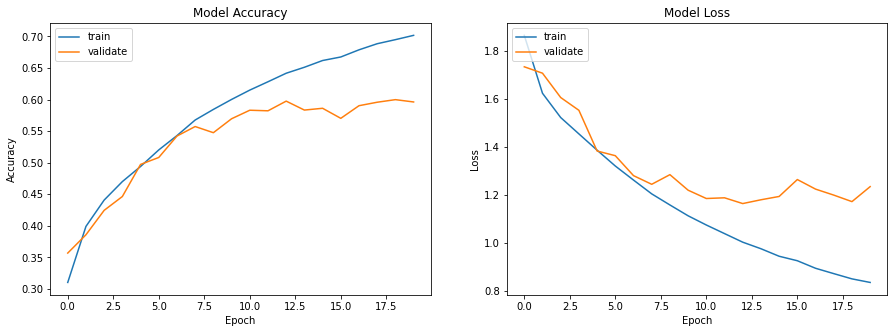

In [ ]:
print(history.history.keys())

plotmodelhistory(history)

#New Model

In [ ]:
model = models.Sequential() 

model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3))) 
model.add(Dropout(0.5))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))    
model.add(layers.Dense(256, activation='relu'))  
model.add(Dropout(0.25))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))    
model.add(BatchNormalization()) 
model.add(layers.Conv2D(64, (5, 5), activation='relu'))    
model.add(layers.MaxPooling2D((2, 2))) 
model.add(Dropout(0.25))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))  

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) 
model.add(Dropout(0.25))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_153 (Conv2D)         (None, 28, 28, 64)        4864      
                                                                 
 dropout_64 (Dropout)        (None, 28, 28, 64)        0         
                                                                 
 conv2d_154 (Conv2D)         (None, 24, 24, 64)        102464    
                                                                 
 dense_46 (Dense)            (None, 24, 24, 256)       16640     
                                                                 
 dropout_65 (Dropout)        (None, 24, 24, 256)       0         
                                                                 
 conv2d_155 (Conv2D)         (None, 20, 20, 64)        409664    
                                                                 
 batch_normalization_19 (Bat  (None, 20, 20, 64)     

In [ ]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1500/1500 [==============================] - 22s 14ms/step - loss: 1.8691 - accuracy: 0.3012 - val_loss: 1.8376 - val_accuracy: 0.3492
Epoch 2/20
1500/1500 [==============================] - 22s 15ms/step - loss: 1.6265 - accuracy: 0.3991 - val_loss: 1.4582 - val_accuracy: 0.4598
Epoch 3/20
1500/1500 [==============================] - 21s 14ms/step - loss: 1.5108 - accuracy: 0.4451 - val_loss: 1.9278 - val_accuracy: 0.3740
Epoch 4/20
1500/1500 [==============================] - 20s 14ms/step - loss: 1.4205 - accuracy: 0.4833 - val_loss: 1.3283 - val_accuracy: 0.5220
Epoch 5/20
1500/1500 [==============================] - 20s 14ms/step - loss: 1.3450 - accuracy: 0.5119 - val_loss: 1.2417 - val_accuracy: 0.5615
Epoch 6/20
1500/1500 [==============================] - 22s 14ms/step - loss: 1.2752 - accuracy: 0.5410 - val_loss: 1.2503 - val_accuracy: 0.5523
Epoch 7/20
1500/1500 [==============================] - 22s 14ms/step - loss: 1.2198 - accuracy: 0.5662 - val_loss: 1.1655 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


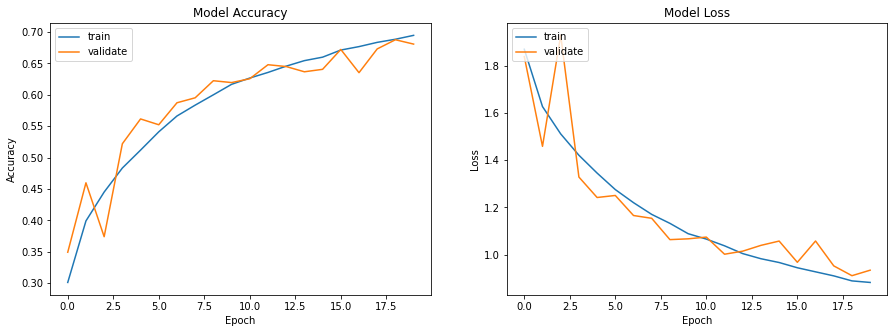

In [ ]:
print(history.history.keys())

plotmodelhistory(history)

5 conv layerlı model train %69 test %68 20 epoch sonrası. Katmanlarda 64 filtre kullanıldı filtre boyutu 5*5 

#Make Predictions

In [ ]:
predictions = model.predict(test_images)

375/375 [==============================] - 1s 2ms/step


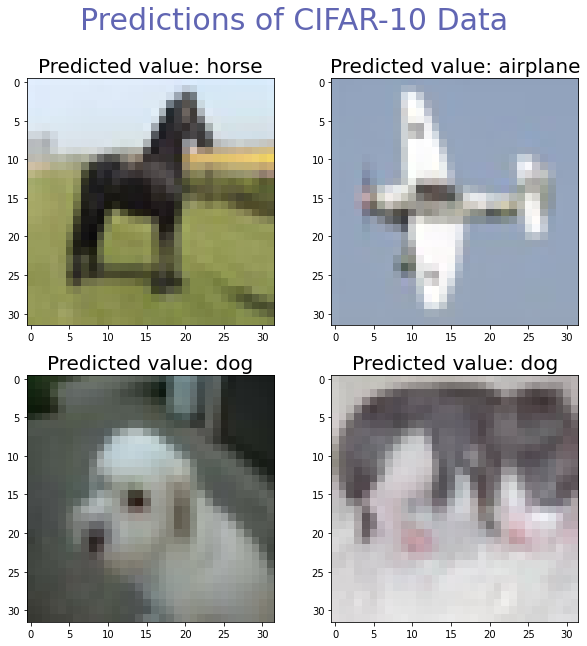

In [ ]:
# Checking the predictions! (Hidden Input

plt.figure(figsize=[10,10])

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.subplot(2,2,1)
n = 3
plt.imshow(test_images[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,2)
n = 4
plt.imshow(test_images[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,3)
n = 8
plt.imshow(test_images[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,4)
n = 6
plt.imshow(test_images[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.suptitle("Predictions of CIFAR-10 Data", size=30, color="#6166B3")

plt.show()

In [ ]:
import random 

## Confusion Matrix

375/375 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 842   20   82   18   57   20   13   25   70   73]
 [  19  902    7    8    3    3   13    3   18  189]
 [  50    3  720   29  171  106   72   21    9   18]
 [   8    0   90  458  108  396   87   43   10   39]
 [   9    1   36   32  954   61   23   53    3    9]
 [   1    3   36   75   85  907   12   55    2   19]
 [   5    3   46   31   94   43  973    9    1   13]
 [   3    0   29   20  108   80    9  944    2   24]
 [  65   17   26   21   12    8    8    8  944   93]
 [  21   23    9   12    6    9   11   14   18 1039]]


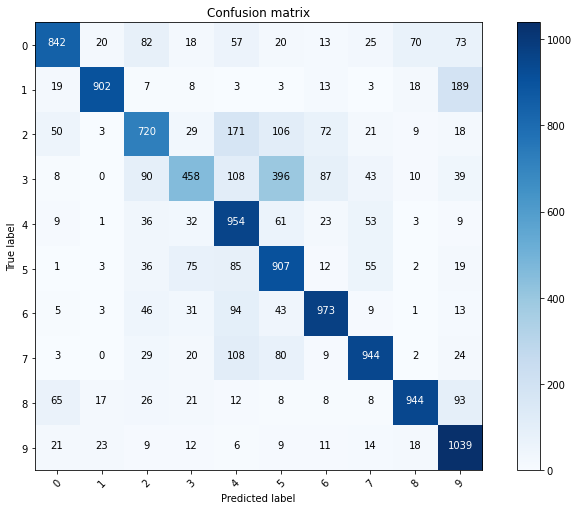

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(test_images).argmax(axis=1)
cm = confusion_matrix(test_labels, p_test)
plot_confusion_matrix(cm, list(range(10)))

## Finding The  5 Most Similar Classes

In [ ]:
def index_dondur(predictions,class_index):  
  cnt = 0  
  i = 0
  index = []
  while i<len(predictions) and cnt<3: 
    if(class_index==np.argmax(predictions[i])): 
      cnt=cnt+1 
      index.append(i)
    i=i+1 

  return index

In [ ]:
indexlerin_listesi = []
for i in range(10): 
  indexlerin_listesi.append(index_dondur(predictions,i))

In [ ]:
indexlerin_listesi

[[4, 9, 13],
 [57, 58, 63],
 [0, 33, 35],
 [2, 17, 26],
 [5, 14, 21],
 [6, 7, 8],
 [24, 27, 36],
 [3, 11, 16],
 [19, 51, 67],
 [1, 15, 32]]

In [ ]:
new_array = np.sort(predictions[4])  
new_array = new_array[5:10]
print(predictions[4])
print(new_array)

[ 5.083404   -1.4181544   1.2621819  -0.24199873  1.9107333  -0.78933746
 -2.4577742  -0.62993747  2.788092    0.7055291 ]
[0.7055291 1.2621819 1.9107333 2.788092  5.083404 ]


In [ ]:
predictions[4][1]

-1.4181544

airplane
ship
deer
bird
truck


In [ ]:
str(class_names[np.argmax(predictions[4], axis=0)])

'airplane'

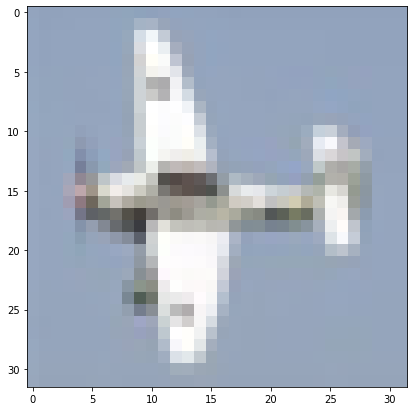

In [ ]:
plt.imshow(test_images[4].reshape(32, 32, -1), cmap=plt.cm.binary) 
plt.show()

In [ ]:
def en_benzer_bes(predictions,k):   
  new_array = np.sort(predictions[k])  
  new_array = new_array[5:10]
  cnt = 4
  i = 0
  while i<10 and cnt>=0: 
    if(new_array[cnt]==predictions[k][i]): 
      print(class_names[i]) 
      cnt = cnt-1
      i = 0
    else: 
     i = i+1


In [ ]:
indexlerin_listesi[1][1]

58

In [ ]:
len(indexlerin_listesi)

10

airplane
ship
deer
bird
truck


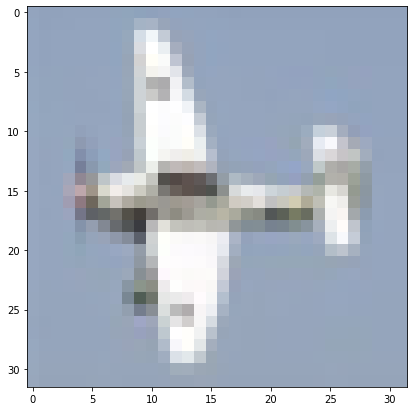

##############################################################33333
airplane
ship
bird
truck
deer


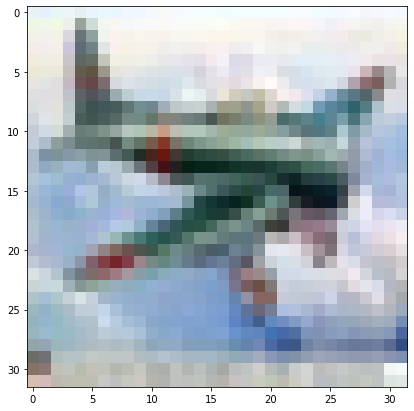

##############################################################33333
airplane
truck
ship
automobile
bird


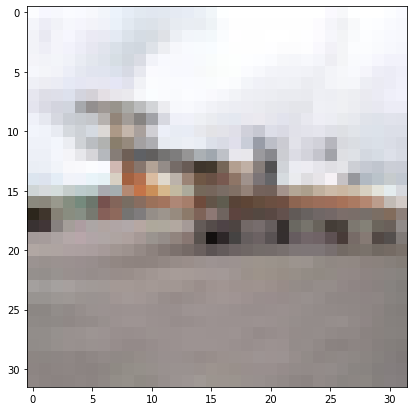

##############################################################33333
automobile
airplane
truck
ship
deer


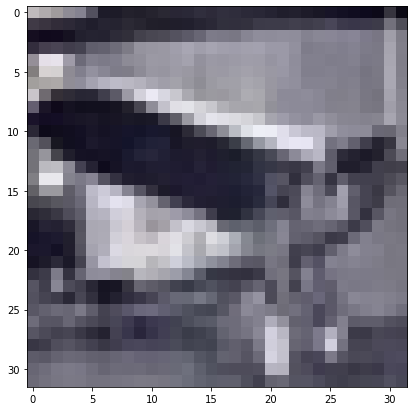

##############################################################33333
automobile
truck
airplane
ship
bird


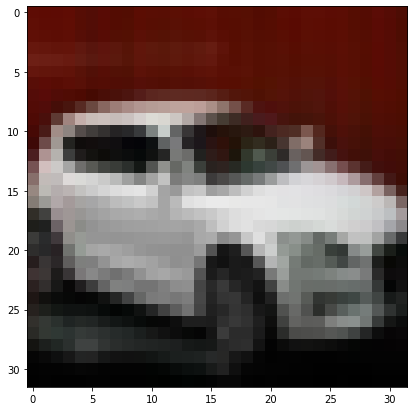

##############################################################33333
automobile
truck
ship
airplane
bird


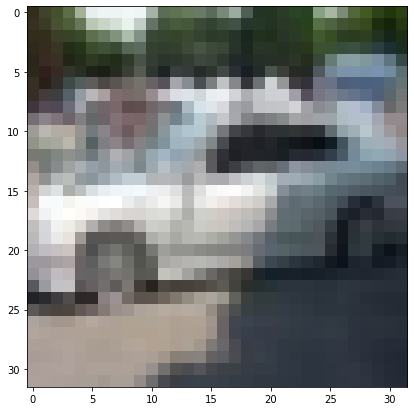

##############################################################33333
bird
frog
deer
dog
cat


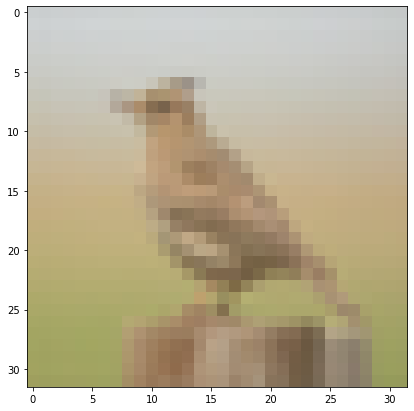

##############################################################33333
bird
horse
dog
deer
cat


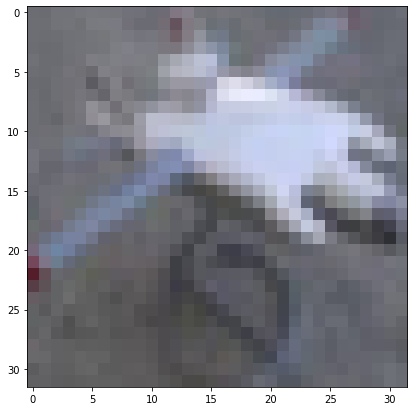

##############################################################33333
bird
dog
deer
cat
frog


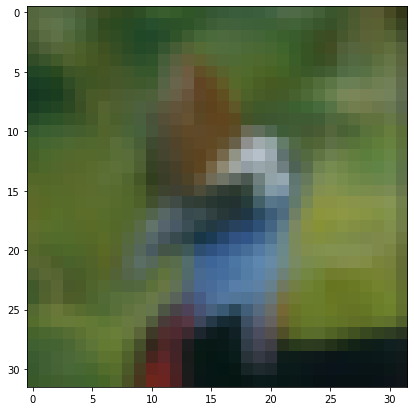

##############################################################33333
cat
dog
bird
frog
deer


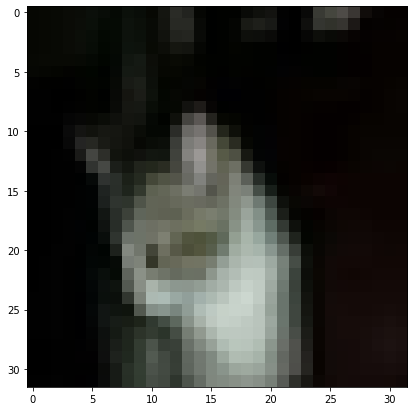

##############################################################33333
cat
bird
dog
frog
deer


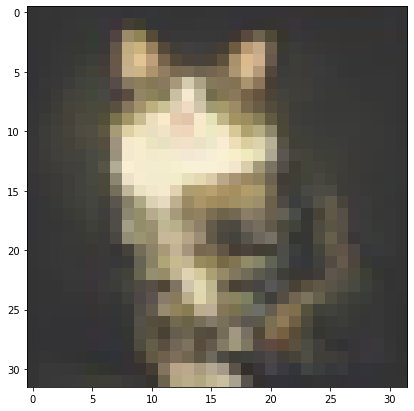

##############################################################33333
cat
deer
dog
bird
frog


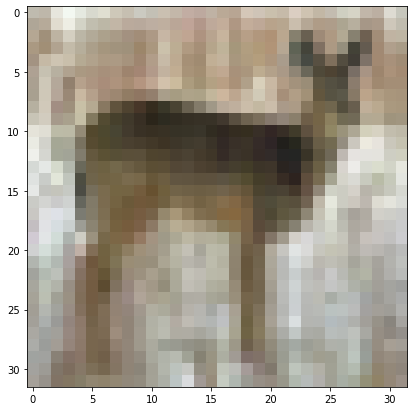

##############################################################33333
deer
bird
cat
airplane
dog


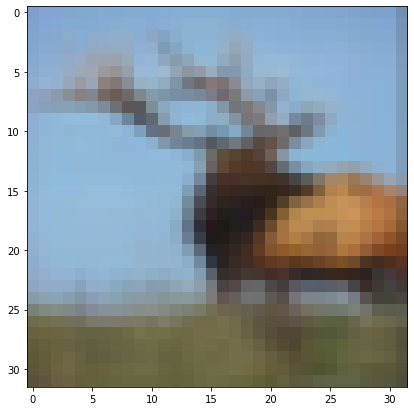

##############################################################33333
deer
bird
cat
frog
dog


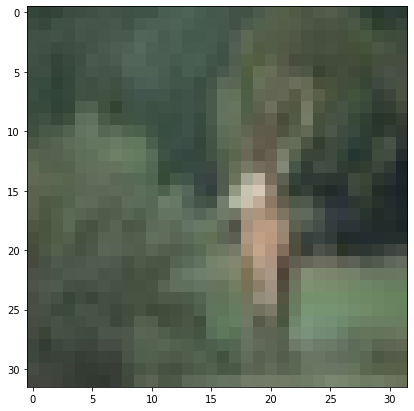

##############################################################33333
deer
bird
cat
dog
frog


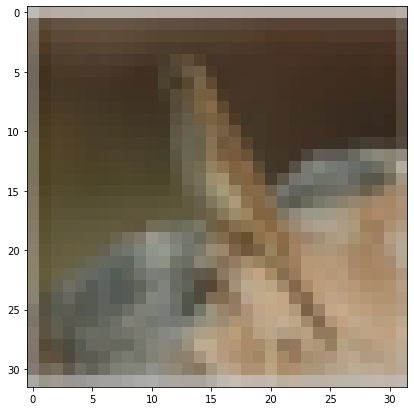

##############################################################33333
dog
cat
horse
bird
deer


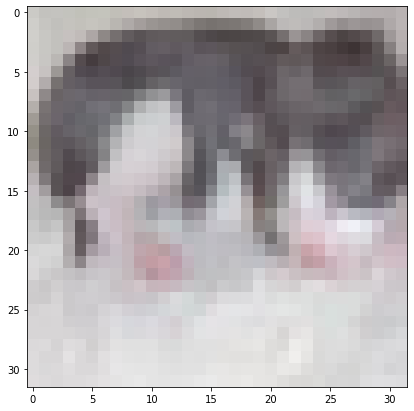

##############################################################33333
dog
deer
horse
cat
bird


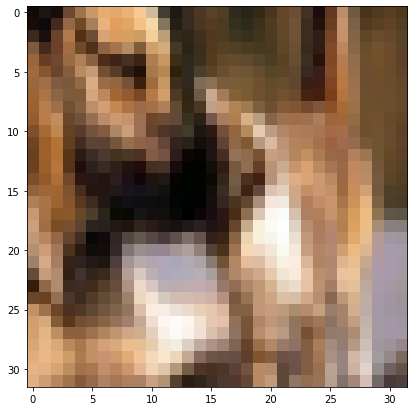

##############################################################33333
dog
cat
bird
horse
deer


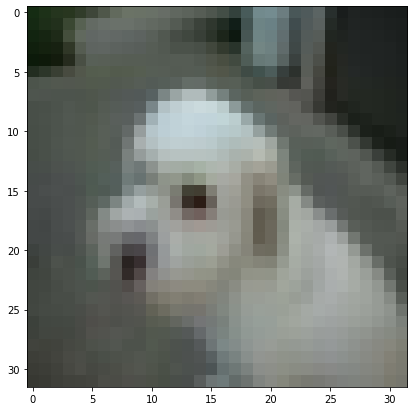

##############################################################33333
frog
bird
cat
deer
dog


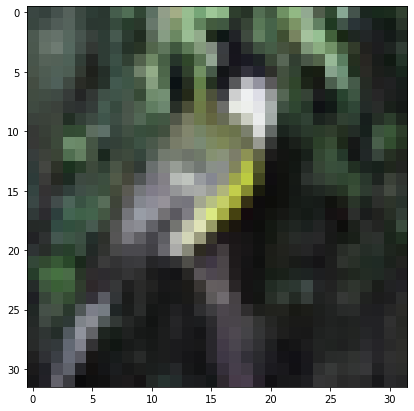

##############################################################33333
frog
dog
deer
cat
bird


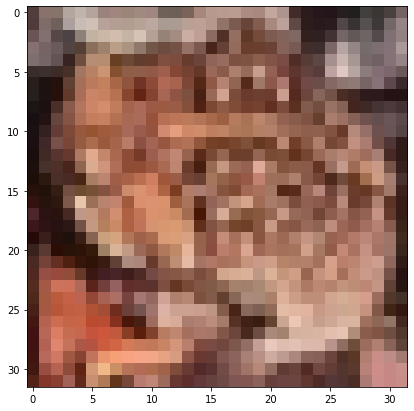

##############################################################33333
frog
bird
deer
cat
dog


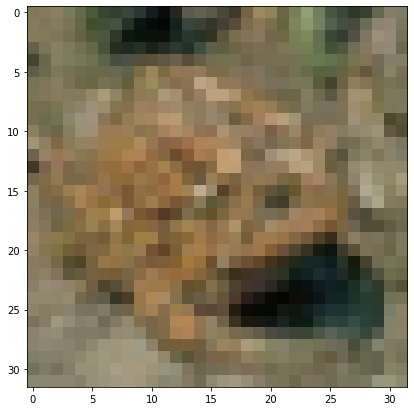

##############################################################33333
horse
deer
dog
bird
cat


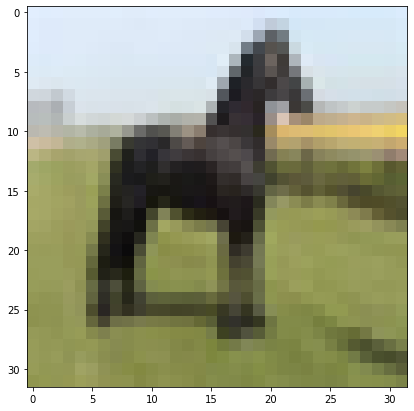

##############################################################33333
horse
deer
dog
bird
cat


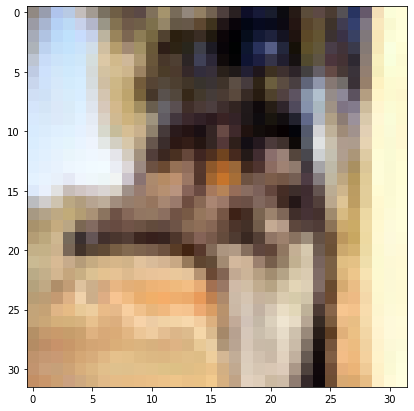

##############################################################33333
horse
deer
dog
cat
frog


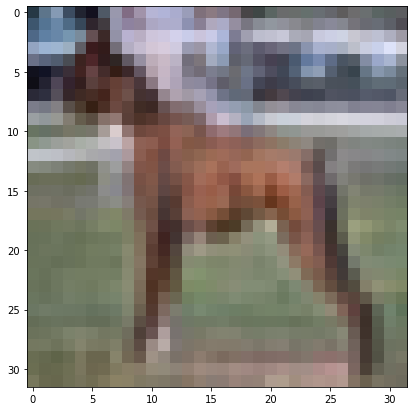

##############################################################33333
ship
airplane
automobile
truck
bird


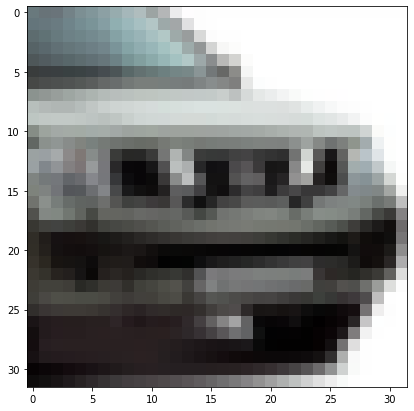

##############################################################33333
ship
airplane
deer
truck
bird


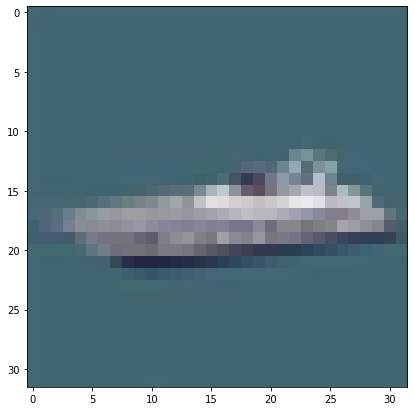

##############################################################33333
ship
airplane
truck
automobile
bird


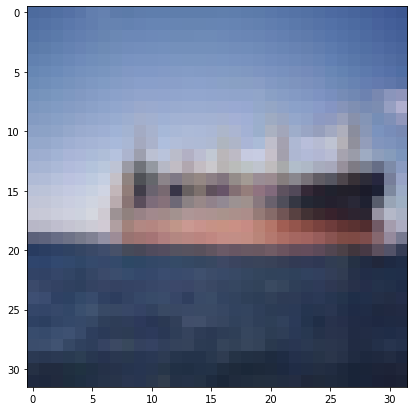

##############################################################33333
truck
automobile
airplane
ship
bird


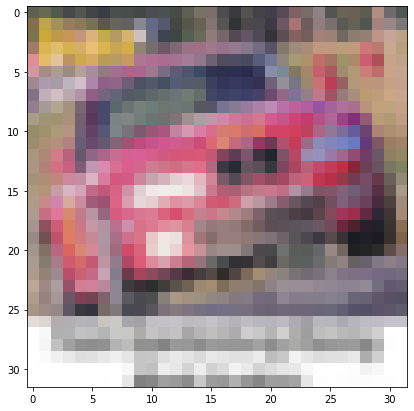

##############################################################33333
truck
automobile
ship
airplane
bird


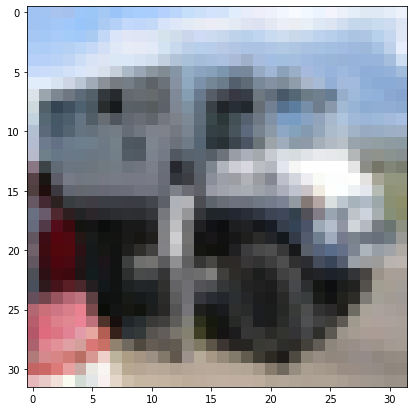

##############################################################33333
truck
airplane
ship
automobile
bird


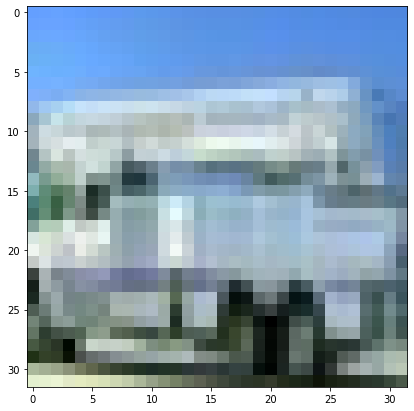

##############################################################33333


In [ ]:
for i in range(len(indexlerin_listesi)): 
  for j in range(3): 
      k=indexlerin_listesi[i][j]  
      en_benzer_bes(predictions,k)  
      plt.imshow(test_images[k].reshape(32, 32, -1), cmap=plt.cm.binary) 
      plt.show()
      print("###################################################################)

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def en_benzer_bes_v2(predictions,k,class_names):    
  tum = []
  new_array = np.sort(predictions[k])  
  new_array = new_array[5:10]
  cnt = 4
  i = 0
  while i<10 and cnt>=0: 
    if(new_array[cnt]==predictions[k][i]): 
      cnt = cnt-1 
      tum.append(class_names[i])
      i = 0
    else: 
     i = i+1 
  

  return tum

In [ ]:
en_benzer_bes_v2(predictions,4,class_names)

['airplane', 'ship', 'deer', 'bird', 'truck']

In [ ]:
test_labels

array([[2],
       [1],
       [3],
       ...,
       [2],
       [6],
       [1]], dtype=uint8)

In [ ]:
import pandas as pd

In [ ]:
col_names =  ['Actual Class', 'First Predicted', 'Second','Third','Fourth','Fifth']
df = pd.DataFrame(columns = col_names) 
df

,Actual Class,First Predicted,Second,Third,Fourth,Fifth


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
for i in range(len(indexlerin_listesi)): 
  tmp = []
  for j in range(3): 
      k=indexlerin_listesi[i][j]  
      tmp = en_benzer_bes_v2(predictions,k,class_names) 
      tmp.insert(0,class_names[test_labels[k][0]]) 
      df.loc[len(df)] = tmp
      print(tmp)

['airplane', 'airplane', 'ship', 'deer', 'bird', 'truck']
['airplane', 'airplane', 'ship', 'bird', 'truck', 'deer']
['airplane', 'airplane', 'truck', 'ship', 'automobile', 'bird']
['airplane', 'automobile', 'airplane', 'truck', 'ship', 'deer']
['automobile', 'automobile', 'truck', 'airplane', 'ship', 'bird']
['automobile', 'automobile', 'truck', 'ship', 'airplane', 'bird']
['bird', 'bird', 'frog', 'deer', 'dog', 'cat']
['airplane', 'bird', 'horse', 'dog', 'deer', 'cat']
['bird', 'bird', 'dog', 'deer', 'cat', 'frog']
['cat', 'cat', 'dog', 'bird', 'frog', 'deer']
['cat', 'cat', 'bird', 'dog', 'frog', 'deer']
['deer', 'cat', 'deer', 'dog', 'bird', 'frog']
['deer', 'deer', 'bird', 'cat', 'airplane', 'dog']
['deer', 'deer', 'bird', 'cat', 'frog', 'dog']
['bird', 'deer', 'bird', 'cat', 'dog', 'frog']
['cat', 'dog', 'cat', 'horse', 'bird', 'deer']
['dog', 'dog', 'deer', 'horse', 'cat', 'bird']
['dog', 'dog', 'cat', 'bird', 'horse', 'deer']
['bird', 'frog', 'bird', 'cat', 'deer', 'dog']
['frog

### Last Table

In [ ]:
df

,Actual Class,First Predicted,Second,Third,Fourth,Fifth
0,airplane,airplane,ship,deer,bird,truck
1,airplane,airplane,ship,bird,truck,deer
2,airplane,airplane,truck,ship,automobile,bird
3,airplane,automobile,airplane,truck,ship,deer
4,automobile,automobile,truck,airplane,ship,bird
5,automobile,automobile,truck,ship,airplane,bird
6,bird,bird,frog,deer,dog,cat
7,airplane,bird,horse,dog,deer,cat
8,bird,bird,dog,deer,cat,frog
9,cat,cat,dog,bird,frog,deer
